In [1]:
import pandas as pd
import unicodedata
from sklearn import preprocessing

df = pd.read_csv("profile_jan_2022.csv", encoding="cp850")

In [5]:
df.head()

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung ▄berschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020
0,0.853350,0.065328,0.228967,2.016161,0.0,0.0,92.799,914.630,245,1891
1,0.857153,0.069790,0.152220,2.000837,0.0,0.0,86.097,832.387,188,1969
2,0.860945,0.064174,0.109599,1.965811,0.0,0.0,72.062,926.463,139,1985
3,0.888022,0.064889,0.055622,2.646621,0.0,0.0,73.376,691.546,115,1852
4,0.859141,0.063968,0.039038,3.246434,0.0,0.0,68.995,453.314,163,1709


In [9]:
def normalize(dataframe, columns=None):
    """
    :return dataframe (normalized):
    """
    df = dataframe

    if columns is None:
        columns = df.columns

    x = df[columns].values  # returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    ndf = pd.DataFrame(x_scaled, columns=df[columns].columns, index=df.index)
    return ndf

<AxesSubplot:>

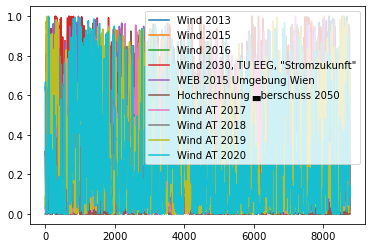

In [10]:
df = normalize(df)

In [16]:
import numpy as np

df.index = np.arange("2021-01-01","2022-01-01 00:00", dtype="datetime64[h]")
df.head()

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung ▄berschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020
2021-01-01 00:00:00,0.623076,0.029658,0.089650,0.301967,0.0,0.0,0.034815,0.313971,0.081336,0.636425
2021-01-01 01:00:00,0.625853,0.031710,0.059536,0.299672,0.0,0.0,0.032298,0.285723,0.062099,0.662732
2021-01-01 02:00:00,0.628622,0.029128,0.042812,0.294426,0.0,0.0,0.027026,0.318035,0.045562,0.668128
2021-01-01 03:00:00,0.648394,0.029456,0.021632,0.396393,0.0,0.0,0.027519,0.237349,0.037462,0.623272
2021-01-01 04:00:00,0.627305,0.029033,0.015125,0.486230,0.0,0.0,0.025874,0.155524,0.053662,0.575042


<AxesSubplot:>

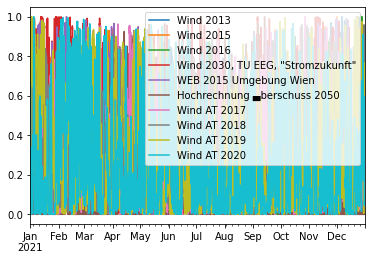

In [17]:
df.plot()

Freigabesignal wenn > x% der Nennleistung

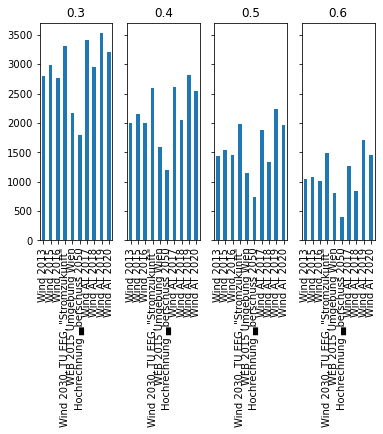

In [45]:
import matplotlib.pyplot as plt

cutoffs = [0.3,0.4,0.5,0.6]
anzahl = pd.DataFrame()
fig, ax = plt.subplots(1, len(cutoffs), sharey=True)
for i, x in enumerate(cutoffs):
    sig = df.where(df>x)
    sig.count().plot(kind="bar", ax=ax[i], title=x)

    anzahl[x] = sig.count()

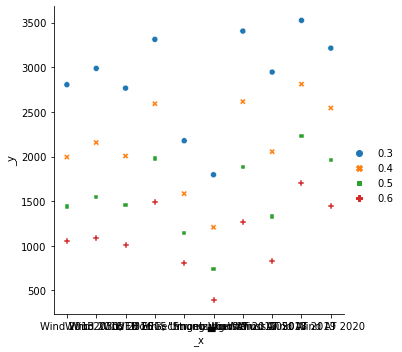

In [49]:
import seaborn as sns
#anzahl
sns.relplot(data=anzahl)

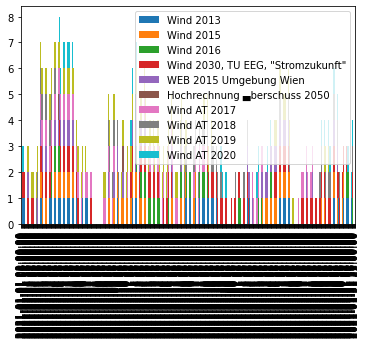

C:\Users\SIMONS~1\AppData\Local\Temp/ipykernel_19524/2364575249.py:6: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_sign["2021-01"].plot(kind="bar", stacked=True)


<AxesSubplot:>

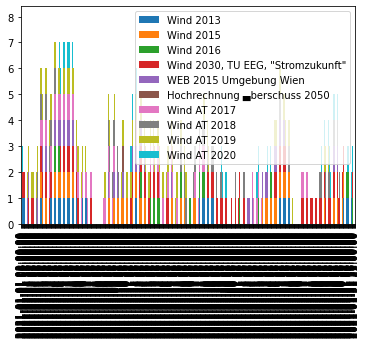

In [80]:
cut = 0.4
df_sign = pd.DataFrame()
for c in df.columns:
    df_sign[c] = df[c].map(lambda x: 0 if x < cut else 1)

df_sign["2021-01"].plot(kind="bar", stacked=True)

In [81]:
df_sign.head()

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung ▄berschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020
2021-01-01 00:00:00,1,0,0,0,0,0,0,0,0,1
2021-01-01 01:00:00,1,0,0,0,0,0,0,0,0,1
2021-01-01 02:00:00,1,0,0,0,0,0,0,0,0,1
2021-01-01 03:00:00,1,0,0,1,0,0,0,0,0,1
2021-01-01 04:00:00,1,0,0,1,0,0,0,0,0,1


,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung ▄berschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020
2021-01-01 00:00:00,1,0,0,0,0,0,0,0,0,1
2021-01-01 01:00:00,1,0,0,0,0,0,0,0,0,1
2021-01-01 02:00:00,1,0,0,0,0,0,0,0,0,1
2021-01-01 03:00:00,1,0,0,0,0,0,0,0,0,1
2021-01-01 04:00:00,1,0,0,1,0,0,0,0,0,1


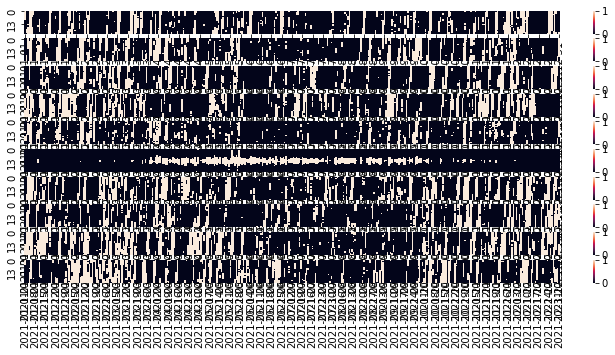

In [112]:
fig, ax = plt.subplots(len(df_sign.columns), 1, sharey=True, figsize=(12,5))
for i, col in enumerate(df_sign.columns):
    vis = pd.pivot_table(df_sign, index=df_sign.index.date, columns=df_sign.index.hour, values=col)
    sns.heatmap(vis.T, ax=ax[i])

C:\Users\SIMONS~1\AppData\Local\Temp/ipykernel_19524/1134532749.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_step["2021"].plot()


<AxesSubplot:>

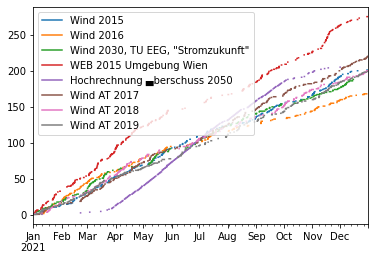

In [113]:
df_step = pd.DataFrame()
for c in df_sign.columns:
    df_step[c] =  df_sign[c].shift(1).ne(df_sign[c]).where(df_sign[c]==1).cumsum()

df_step["2021"].plot()

In [142]:
desc = pd.DataFrame()
desc["Zeitraum mit Signal [h]"] = anzahl[0.4]
desc["Nicht-Signal-Zeitraum [h]"] = 8760 - anzahl[0.4]
desc["Anzahl Signal-Perioden"] = df_step.max()
desc["Durchschnittliche Dauer Signal [h]"] = (desc["Zeitraum mit Signal [h]"]/desc["Anzahl Signal-Perioden"])
desc["Durchschnittliche Dauer Nicht-Signal [h]"] = desc["Nicht-Signal-Zeitraum [h]"]/desc["Anzahl Signal-Perioden"]

desc

TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

<AxesSubplot:>

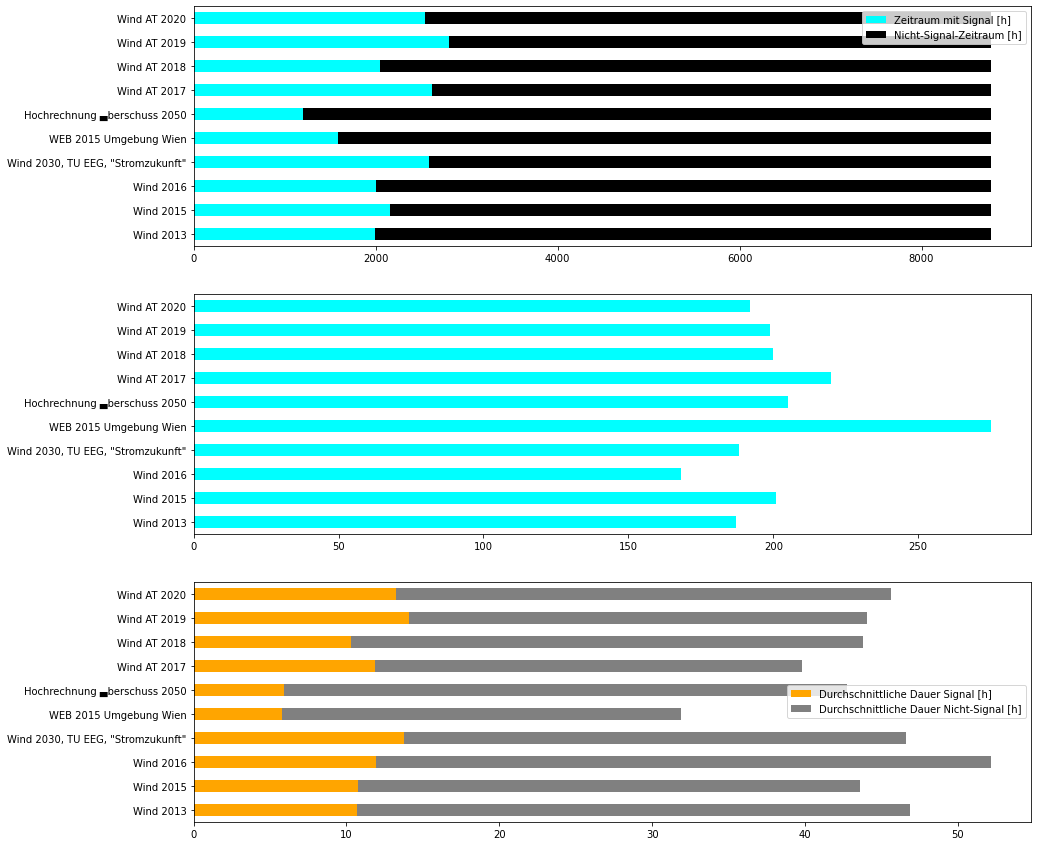

In [109]:
fig, ax = plt.subplots(3,1, figsize=(15,15))
desc[["Zeitraum mit Signal [h]","Nicht-Signal-Zeitraum [h]"]]\
    .plot(kind="barh",color=["cyan", "black"], stacked=True, ax = ax[0])

desc["Anzahl Signal-Perioden"]\
    .plot(kind="barh",color=["cyan"], stacked=True, ax = ax[1])

desc[["Durchschnittliche Dauer Signal [h]","Durchschnittliche Dauer Nicht-Signal [h]"]]\
    .plot(kind="barh",color=["orange", "grey"], stacked=True, ax = ax[2])

In [152]:
groups = pd.DataFrame()
for c in df_step.columns:
    groups[c] =  df_step.groupby(c)[c].count()

array([[<AxesSubplot:title={'center':'Wind 2013'}>,
        <AxesSubplot:title={'center':'Wind 2015'}>,
        <AxesSubplot:title={'center':'Wind 2016'}>],
       [<AxesSubplot:title={'center':'Wind 2030, TU EEG, "Stromzukunft"'}>,
        <AxesSubplot:title={'center':'WEB 2015 Umgebung Wien'}>,
        <AxesSubplot:title={'center':'Hochrechnung ▄berschuss 2050'}>],
       [<AxesSubplot:title={'center':'Wind AT 2017'}>,
        <AxesSubplot:title={'center':'Wind AT 2018'}>,
        <AxesSubplot:title={'center':'Wind AT 2019'}>],
       [<AxesSubplot:title={'center':'Wind AT 2020'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

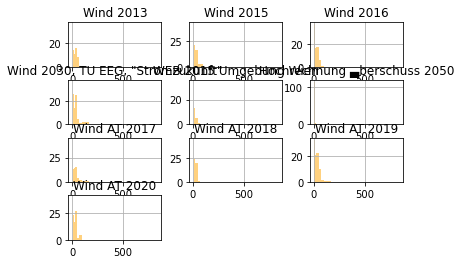

In [148]:
bins= [6,12,18,24,48,72,96,168, 168*2, 168*3, 168*5 ]
groups.hist(bins=bins, alpha=0.5, histtype="stepfilled",color=["orange"])

<AxesSubplot:ylabel='Count'>

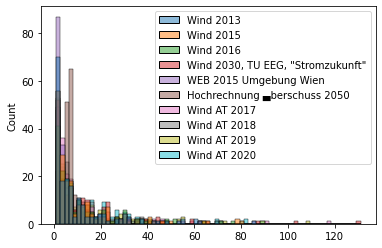

In [154]:
sns.histplot(groups)

